 # <center>  NoteBook : Analyse Exploratoire <center>

La Mairie de Paris fait appel à la société SMOVENGO pour analyser les jeux de données concernant "Velib'Métropole".

La Mairie de Paris attend de SMOVENGO d'étudier une stratégie afin de maintenir son rôle dans le développement des Grands paris Express dans un objectif de développement durable.

Nous avons à notre disposition des fichiers .csv, pour notre analyse nous utiliserons le mois de Janvier.

---------------------------------------------------------------------------------------------


In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
import geopy.distance
import matplotlib.pyplot as plt

## Importation

In [3]:
station_Gparis = pd.read_csv("liste_gares_grand_paris_cleaned.csv")
station_Velib  = pd.read_csv("liste_stations_cleaned.csv")

In [4]:
# Chemin du dossier contenant les fichiers CSV
chemin_dossier = 'drive_adil'

# Liste en compréhension pour stocker les DataFrames
dataframes = [pd.read_csv(os.path.join(chemin_dossier, fichier)) 
              for fichier in os.listdir(chemin_dossier) if fichier.endswith('.csv')]

# Vérifier si la liste n'est pas vide
if dataframes:
    # Concaténer les DataFrames en un seul DataFrame
    df = pd.concat(dataframes, ignore_index=True)
else:
    print("Aucun fichier CSV trouvé dans le dossier.")

df.head(5)

,name,stationcode,ebike,mechanical,coordonnees_geo,duedate,numbikesavailable,numdocksavailable,capacity,is_renting,is_installed,nom_arrondissement_communes,is_returning,ping_time
0,Benjamin Godard - Victor Hugo,16107,1,1,"[48.865983, 2.275725]",2022-12-31T00:59:18+01:00,2,33,35.0,OUI,OUI,Paris,OUI,31/12/2022 01:10:01
1,Charonne - Robert et Sonia Delauney,11104,1,0,"[48.85590755596891, 2.3925706744194035]",2022-12-31T00:51:25+01:00,1,19,20.0,OUI,OUI,Paris,OUI,31/12/2022 01:10:01
2,Mairie de Rosny-sous-Bois,31104,8,2,"[48.871256519012, 2.4865807592869]",2022-12-31T00:56:26+01:00,10,19,30.0,OUI,OUI,Rosny-sous-Bois,OUI,31/12/2022 01:10:01
3,Cassini - Denfert-Rochereau,14111,3,3,"[48.837525839067, 2.3360354080796]",2022-12-31T00:58:03+01:00,6,19,25.0,OUI,OUI,Paris,OUI,31/12/2022 01:10:01
4,Toudouze - Clauzel,9020,2,0,"[48.87929591733507, 2.3373600840568547]",2022-12-31T00:50:36+01:00,2,19,21.0,OUI,OUI,Paris,OUI,31/12/2022 01:10:01


In [5]:
df.shape

(6208767, 14)

## Profiling

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6208767 entries, 0 to 6208766
Data columns (total 14 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   name                         object 
 1   stationcode                  int64  
 2   ebike                        int64  
 3   mechanical                   int64  
 4   coordonnees_geo              object 
 5   duedate                      object 
 6   numbikesavailable            int64  
 7   numdocksavailable            int64  
 8   capacity                     float64
 9   is_renting                   object 
 10  is_installed                 object 
 11  nom_arrondissement_communes  object 
 12  is_returning                 object 
 13  ping_time                    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 663.2+ MB


In [7]:
df.isnull().sum()

name                           12
stationcode                     0
ebike                           0
mechanical                      0
coordonnees_geo                12
duedate                         0
numbikesavailable               0
numdocksavailable               0
capacity                       12
is_renting                      0
is_installed                    0
nom_arrondissement_communes    12
is_returning                    0
ping_time                       0
dtype: int64

In [8]:
df.loc[df['name'].isnull()]

,name,stationcode,ebike,mechanical,coordonnees_geo,duedate,numbikesavailable,numdocksavailable,capacity,is_renting,is_installed,nom_arrondissement_communes,is_returning,ping_time
2535888,NaN,6201,0,0,NaN,2023-01-12T13:29:07+01:00,0,0,NaN,NON,NON,NaN,NON,12/01/2023 13:40:01
2535916,NaN,26013,0,0,NaN,2023-01-12T13:30:57+01:00,0,0,NaN,NON,NON,NaN,NON,12/01/2023 13:40:01
2537318,NaN,6201,0,0,NaN,2023-01-12T13:29:07+01:00,0,0,NaN,NON,NON,NaN,NON,12/01/2023 13:50:01
2537344,NaN,26013,0,0,NaN,2023-01-12T13:30:57+01:00,0,0,NaN,NON,NON,NaN,NON,12/01/2023 13:50:01
2538734,NaN,6201,0,0,NaN,2023-01-12T13:29:07+01:00,0,0,NaN,NON,NON,NaN,NON,12/01/2023 14:00:02
2538756,NaN,26013,0,0,NaN,2023-01-12T13:30:57+01:00,0,0,NaN,NON,NON,NaN,NON,12/01/2023 14:00:02
4903091,NaN,22209,0,0,NaN,2023-01-25T15:08:47+01:00,0,0,NaN,NON,NON,NaN,NON,25/01/2023 16:10:01
4904473,NaN,22209,0,0,NaN,2023-01-25T15:08:47+01:00,0,0,NaN,NON,NON,NaN,NON,25/01/2023 16:20:01
4905935,NaN,22209,0,0,NaN,2023-01-25T15:08:47+01:00,0,0,NaN,NON,NON,NaN,NON,25/01/2023 16:30:12
4907365,NaN,22209,0,0,NaN,2023-01-25T15:08:47+01:00,0,0,NaN,NON,NON,NaN,NON,25/01/2023 16:40:23


Nous remarquons que ces stations n'ont pas encore été installées, elles ne nous apportent pas plus d'informations.

Alors, nous décidons de les supprimer.

In [9]:
df = df.dropna()

In [10]:
# Vérification
df.isnull().sum()

name                           0
stationcode                    0
ebike                          0
mechanical                     0
coordonnees_geo                0
duedate                        0
numbikesavailable              0
numdocksavailable              0
capacity                       0
is_renting                     0
is_installed                   0
nom_arrondissement_communes    0
is_returning                   0
ping_time                      0
dtype: int64

In [11]:
# Convertion en datetime des colonnes contenant des dates 
df['duedate']   = pd.to_datetime(df['duedate'],utc= True)
df['duedate']   = df['duedate'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['ping_time'] = pd.to_datetime(df['ping_time'], format='%d/%m/%Y %H:%M:%S')

In [12]:
# Vérification du passage en datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208755 entries, 0 to 6208766
Data columns (total 14 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   name                         object        
 1   stationcode                  int64         
 2   ebike                        int64         
 3   mechanical                   int64         
 4   coordonnees_geo              object        
 5   duedate                      object        
 6   numbikesavailable            int64         
 7   numdocksavailable            int64         
 8   capacity                     float64       
 9   is_renting                   object        
 10  is_installed                 object        
 11  nom_arrondissement_communes  object        
 12  is_returning                 object        
 13  ping_time                    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 710.5+ MB


In [13]:
#Liste de toutes les colonnes sauf celle à exclure
colonnes_sans_exclue = [colonne for colonne in df.columns if colonne != 'ping_time']

#Vérification des doublons en excluant la colonne 'ColonneExclue'
test_drop = df[df.duplicated(subset=colonnes_sans_exclue, keep= False)]

#Affichage des lignes qui sont des doublons
test_drop

,name,stationcode,ebike,mechanical,coordonnees_geo,duedate,numbikesavailable,numdocksavailable,capacity,is_renting,is_installed,nom_arrondissement_communes,is_returning,ping_time
0,Benjamin Godard - Victor Hugo,16107,1,1,"[48.865983, 2.275725]",2022-12-30 23:59:18,2,33,35.0,OUI,OUI,Paris,OUI,2022-12-31 01:10:01
1,Charonne - Robert et Sonia Delauney,11104,1,0,"[48.85590755596891, 2.3925706744194035]",2022-12-30 23:51:25,1,19,20.0,OUI,OUI,Paris,OUI,2022-12-31 01:10:01
2,Mairie de Rosny-sous-Bois,31104,8,2,"[48.871256519012, 2.4865807592869]",2022-12-30 23:56:26,10,19,30.0,OUI,OUI,Rosny-sous-Bois,OUI,2022-12-31 01:10:01
4,Toudouze - Clauzel,9020,2,0,"[48.87929591733507, 2.3373600840568547]",2022-12-30 23:50:36,2,19,21.0,OUI,OUI,Paris,OUI,2022-12-31 01:10:01
5,Jourdan - Stade Charléty,14014,6,2,"[48.819428333369, 2.3433353751898]",2022-12-30 23:57:21,8,50,60.0,OUI,OUI,Paris,OUI,2022-12-31 01:10:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208762,Stade Pershing,12164,5,16,"[48.829107826857424, 2.458353526890278]",2023-01-30 20:19:15,21,3,26.0,OUI,OUI,Paris,OUI,2023-02-01 08:40:01
6208763,Saint Pères - Saint Germain,6201,0,0,"[48.853729675265, 2.3300181032703]",2023-01-19 08:32:29,0,0,0.0,NON,NON,Paris,NON,2023-02-01 08:40:01
6208764,Henri Barbusse - Marcel Cachin,32022,0,0,"[48.938452457583, 2.3718065906479]",2023-01-18 10:56:20,0,37,37.0,NON,NON,Saint-Denis,NON,2023-02-01 08:40:01
6208765,Verdun - Henri Barbusse,22209,0,0,"[48.802056061754, 2.3159965061736]",2023-01-30 15:03:39,0,0,0.0,NON,NON,Bagneux,NON,2023-02-01 08:40:01


Nous observons des doublons au niveau d'une heure identique due au ping time, nous décidons de créer une fonction qui les supprimera

In [14]:
df = df.drop_duplicates(subset=colonnes_sans_exclue, keep='first')

In [15]:
df['duedate']   = pd.to_datetime(df['duedate'],utc= True)
# Création de la fonction
def drop_data(df):
# Créer une colonne 'duedate_str' contenant la date formatée en chaîne de caractères
    df['duedate_temp'] = df['duedate'].dt.strftime('%d/%m/%Y %H:%M:%S')
    
# Supprimer les lignes en double en se basant sur les colonnes et conservant uniquement la première occurrence
    df = df.drop_duplicates(subset=['name', 'duedate_temp', 'numbikesavailable'], keep='first')
    
# Supprimer la colonne 'duedate_str' temporaire
    df = df.drop(columns='duedate_temp')
    
    return df

In [16]:
# Appel de la fonction
df = drop_data(df)
df.shape

(2607805, 14)

In [17]:
df.head()

,name,stationcode,ebike,mechanical,coordonnees_geo,duedate,numbikesavailable,numdocksavailable,capacity,is_renting,is_installed,nom_arrondissement_communes,is_returning,ping_time
0,Benjamin Godard - Victor Hugo,16107,1,1,"[48.865983, 2.275725]",2022-12-30 23:59:18+00:00,2,33,35.0,OUI,OUI,Paris,OUI,2022-12-31 01:10:01
1,Charonne - Robert et Sonia Delauney,11104,1,0,"[48.85590755596891, 2.3925706744194035]",2022-12-30 23:51:25+00:00,1,19,20.0,OUI,OUI,Paris,OUI,2022-12-31 01:10:01
2,Mairie de Rosny-sous-Bois,31104,8,2,"[48.871256519012, 2.4865807592869]",2022-12-30 23:56:26+00:00,10,19,30.0,OUI,OUI,Rosny-sous-Bois,OUI,2022-12-31 01:10:01
3,Cassini - Denfert-Rochereau,14111,3,3,"[48.837525839067, 2.3360354080796]",2022-12-30 23:58:03+00:00,6,19,25.0,OUI,OUI,Paris,OUI,2022-12-31 01:10:01
4,Toudouze - Clauzel,9020,2,0,"[48.87929591733507, 2.3373600840568547]",2022-12-30 23:50:36+00:00,2,19,21.0,OUI,OUI,Paris,OUI,2022-12-31 01:10:01


## Création de colonne calculée

- Taux de Disponibilités (Bornes & Velo) : ([Nb disponibles] / [Nombres station])


In [18]:
df['Ratio_dispo_velo']  = df['numbikesavailable']/df['capacity']
df['Ratio_dispo_borne'] = df['numdocksavailable']/df['capacity']

## Visualisation

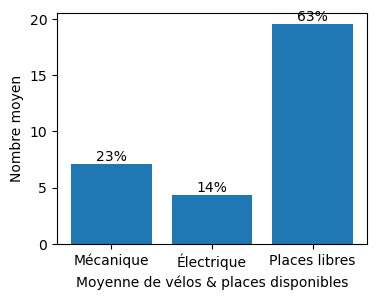

In [19]:
# Calculer la moyenne du nombre de vélos disponibles pour chaque type
mechanical_avg = df["mechanical"].mean()
ebike_avg      = df["ebike"].mean()
dock_avg       = df['numdocksavailable'].mean()

# Calculer les pourcentages
total = sum([mechanical_avg, ebike_avg, dock_avg])
mechanical_percent = (mechanical_avg / total) * 100
ebike_percent      = (ebike_avg / total) * 100
dock_percent       = (dock_avg / total) * 100

# Étiquettes des barres
labels = ["Mécanique", "Électrique", "Places libres"]

# Valeurs des moyennes
means  = [mechanical_avg, ebike_avg, dock_avg]

# Valeurs en pourcentage
percentages = [mechanical_percent, ebike_percent, dock_percent]

# Définir la taille de la figure
plt.figure(figsize=(4, 3))

# Tracer le graphique à barres
plt.bar(labels, means)

# Ajouter les annotations de pourcentage
for i in range(len(labels)):
    plt.text(i, means[i], f"{round(percentages[i])}%", ha='center', va='bottom')

# Titres et libellés des axes
plt.ylabel('Nombre moyen')
plt.xlabel("Moyenne de vélos & places disponibles")

# Afficher le graphique
plt.show()


Nous remarquons grâce à ses graphiques qu'il y a seulement 37% de la capacité des vélos utilisés

D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


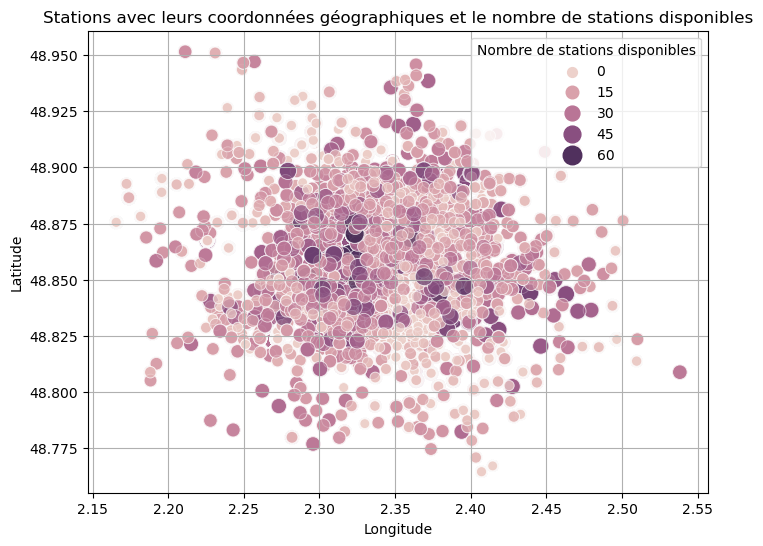

In [25]:
import seaborn as sns
# Extraction des coordonnées géographiques en latitude et longitude
df[['latitude', 'longitude']] = df['coordonnees_geo'].str.split(',', expand=True)
df['latitude'] = df['latitude'].str.strip('[').astype(float)
df['longitude'] = df['longitude'].str.strip(']').astype(float)

# Renommage de la colonne 'numdocksavailable'
df.rename(columns={'numdocksavailable': 'Nombre de stations disponibles'}, inplace=True)

# Affichage de la visualisation avec Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', size='Nombre de stations disponibles', sizes=(50, 200),
                hue='Nombre de stations disponibles', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Stations avec leurs coordonnées géographiques et le nombre de stations disponibles')
plt.grid(True)
plt.show()

## Exportation des fichiers

In [ ]:
#df.to_csv('Velib_Caps3_clean.csv', index=False) 